#### Copyright 2018 Google LLC.

In [6]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Классификация изображений кошек и собак
## Упражнение 1. Построение сверточной нейронной сети с нуля
**_Расчетное время выполнения: 20 минут_**

В этом упражнении мы с нуля построим модель классификатора, которая сможет отличать собак от кошек. Мы выполним следующие шаги:

1. Изучение примера данных
2. Построение небольшой сверточной нейронной сети с нуля для решения нашей задачи классификации
3. Оценка точности обучения и проверки

## Explore the Example Data

Давайте начнем с загрузки наших примеров данных - архива .zip с 2000 изображениями в формате JPG с изображениями кошек и собак, и распакуем его локально в папку `/tmp`

**ПРИМЕЧАНИЕ:** В этом упражнении используется подмножество из 2000 изображений из набора данных ["Dogs vs. Cats"](https://www.kaggle.com/c/dogs-vs-cats/data), доступного на Kaggle, который содержит 25000 изображений. Здесь мы используем подмножество полного набора данных, чтобы сократить время обучения в образовательных целях.

In [7]:
#загрузка архива с помощью url адресса
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-11-03 11:34:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   212MB/s    in 0.3s    

2023-11-03 11:34:10 (212 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
import os #для работы с операционной системой, включая работу с файлами и директориями
import zipfile #предоставляет функции для работы с архивами ZIP

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') #для чтения
zip_ref.extractall('/tmp') #извлекает все файлы и директории из архива в директорию /tmp
zip_ref.close()

Содержимое .zip-архива извлекается в базовую директорию `/tmp/cats_and_dogs_filtered`, которая содержит поддиректории `train` и `validation` для обучающего и проверочного наборов данных ([Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition)), которые, в свою очередь, содержат поддиректории `cats` и `dogs`. Давайте определим каждую из этих директорий:

In [9]:
base_dir = '/tmp/cats_and_dogs_filtered' #определяет базовую директорию, в которой находятся извлеченные файлы из архива
train_dir = os.path.join(base_dir, 'train') #обучающие данные
validation_dir = os.path.join(base_dir, 'validation') #для проверки

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Теперь давайте посмотрим, как выглядят имена файлов в директориях `cats` и `dogs` внутри директории train (соглашения о именовании файлов такие же в директории `validation`):

In [10]:
train_cat_fnames = os.listdir(train_cats_dir) #полученим списка имен файлов
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort() #отсортировка списков имен файлов в алфавитном порядке
print(train_dog_fnames[:10])

['cat.749.jpg', 'cat.106.jpg', 'cat.632.jpg', 'cat.953.jpg', 'cat.57.jpg', 'cat.746.jpg', 'cat.49.jpg', 'cat.577.jpg', 'cat.308.jpg', 'cat.917.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Давайте узнаем общее количество изображений кошек и собак в директориях `train` и `validation`:

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Для кошек и собак у нас есть 1000 обучающих изображений и 500 тестовых изображений.
Теперь давайте посмотрим на несколько изображений, чтобы лучше понять, как выглядят наборы данных с кошками и собаками. Сначала настроим параметры для библиотеки matplotlib:

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Параметры нашего графика; мы выведем изображения в конфигурации 4x4
nrows = 4
ncols = 4

# Индекс для перебора изображений
pic_index = 0

Теперь отобразим пакет из 8 изображений кошек и 8 изображений собак. Вы можете запускать ячейку снова, чтобы каждый раз видеть новый пакет:

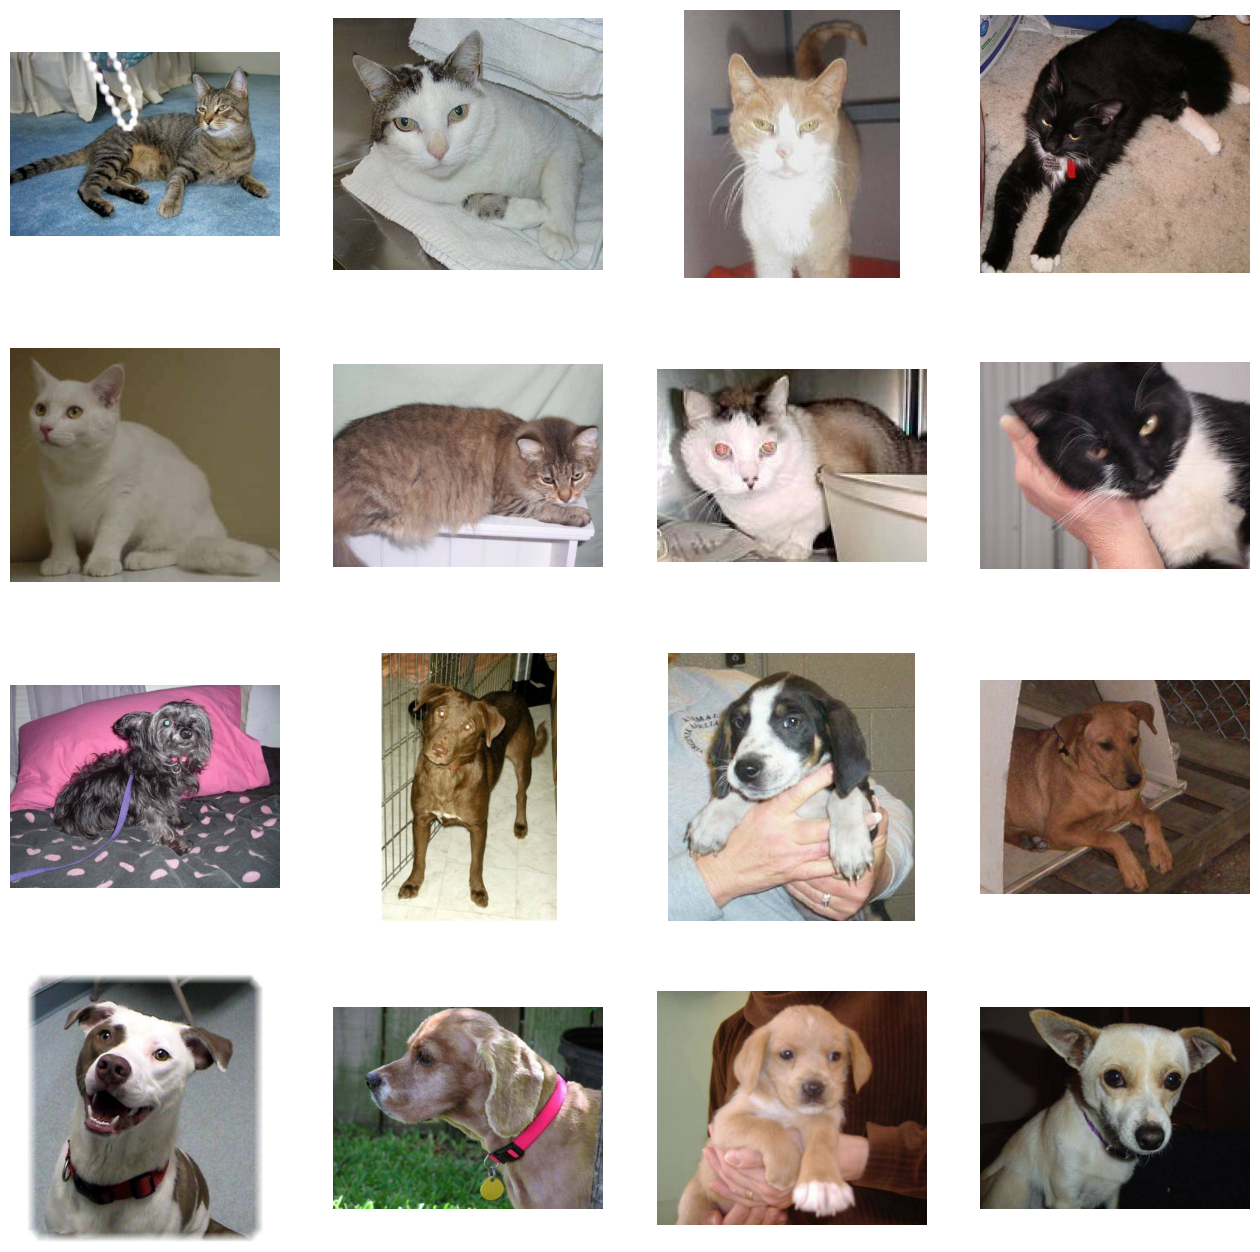

In [13]:
# Настройте рисунок matplotlib и измените его размер так, чтобы он соответствовал изображениям 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Настройте подсюжет; индексы подграфиков начинаются с 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Не показывать оси (или линии сетки)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


##Построение небольшой сверточной нейронной сети с нуля для достижения точности 72%
Изображения, которые будут использоваться в нашей сверточной нейронной сети, имеют размер 150x150 пикселей и цветовую глубину (в следующем разделе о предобработке данных мы добавим обработку для изменения размера всех изображений до 150x150 перед их подачей на вход нейронной сети).

Давайте напишем код для архитектуры. Мы будем использовать 3 модуля {свертка + relu + пулинг} в стеке. Наши свертки будут работать с окнами размером 3x3, а слои пулинга будут работать с окнами размером 2x2. Первая свертка извлекает 16 фильтров, следующая извлекает 32 фильтра, а последняя извлекает 64 фильтра.

ПРИМЕЧАНИЕ: Это конфигурация, которая широко используется и известна своей эффективностью в задачах классификации изображений. Кроме того, поскольку у нас относительно небольшое количество обучающих примеров (1,000), использование только трех сверточных модулей позволяет сделать модель компактной и снижает риск переобучения (о чем мы подробнее рассмотрим в Упражнении 2).

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [15]:
# Наша входная карта объектов имеет размер 150x150x3: 150x150 для пикселей изображения и 3 для
# три цветовых канала: R, G и B
img_input = layers.Input(shape=(150, 150, 3))

# Первая свертка извлекает 16 фильтров размером 3х3
# За сверткой следует слой максимального пула с окном 2х2.
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Вторая свертка извлекает 32 фильтра размером 3х3
# За сверткой следует слой максимального пула с окном 2х2.
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Третья свертка извлекает 64 фильтра размером 3х3
# За сверткой следует слой максимального пула с окном 2х2.
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

На вершине нашей сети мы добавляем два полносвязных слоя. Поскольку мы сталкиваемся с задачей двухклассовой классификации, то есть бинарной классификацией, мы заканчиваем нашу сеть с [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), чтобы выход нашей сети был одним скаляром в диапазоне от 0 до 1, кодирующим вероятность того, что текущее изображение принадлежит классу 1 (в отличие от класса 0).

In [16]:
# Сгладить карту объектов до 1-мерного тензора, чтобы мы могли добавлять полностью связанные слои
x = layers.Flatten()(x)

# Создайте полностью связанный слой с активацией ReLU и 512 скрытыми модулями.
x = layers.Dense(512, activation='relu')(x)

# Создайте выходной слой с одним узлом и активацией сигмовидной кишки
output = layers.Dense(1, activation='sigmoid')(x)

# Создать модель:
# input = входная карта объектов
# output = входная карта объектов + сложенные слои свертки/макспулинга + полностью
# подключенный слой + выходной слой сигмовидной кишки
model = Model(img_input, output)

Подведем итоги архитектуры модели:

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

Далее мы настроим спецификации для обучения модели. Мы будем обучать нашу модель с потерей `binary_crossentropy`, потому что это проблема двоичной классификации, и наша конечная активация — это сигмоида. (Для повышения квалификации по показателям потерь см. [Ускоренный курс машинного обучения](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) Мы будем использовать оптимизатор rmsprop со скоростью обучения 0,001. Во время обучения мы хотим контролировать точность классификации.

**ПРИМЕЧАНИЕ**. В этом случае использование [алгоритма оптимизации RMSprop](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) предпочтительнее [стохастического градиентного спуска](https://developers.google.com /machine-learning/glossary/#SGD) (SGD), потому что RMSprop автоматизирует для нас настройку скорости обучения. (Другие оптимизаторы, такие как [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) и [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), также автоматически адаптирует скорость обучения во время обучения и здесь будет работать одинаково хорошо.)

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Предварительная обработка данных

Давайте настроим генераторы данных, которые будут считывать изображения в наших исходных папках, преобразовывать их в тензоры float32 и передавать их (вместе с метками) в нашу сеть. У нас будет один генератор для обучающих изображений и один для проверочных изображений. Наши генераторы будут генерировать пакеты из 20 изображений размером 150x150 и их метки (двоичные).

Как вы, возможно, уже знаете, данные, поступающие в нейронные сети, обычно должны быть каким-то образом нормализованы, чтобы сделать их более пригодными для обработки сетью. (Необработанные пиксели подаются в коннет редко.) В нашем случае мы будем предварительно обрабатывать наши изображения, нормализуя значения пикселей так, чтобы они находились в диапазоне `[0, 1]` (изначально все значения находятся в диапазоне `[0, 1]` 255]` диапазон).

В Keras это можно сделать с помощью класса keras.preprocessing.image.ImageDataGenerator с использованием параметра rescale. Этот класс ImageDataGenerator позволяет создавать экземпляры генераторов дополненных пакетов изображений (и их меток) через .flow(data, labels) или .flow_from_directory(directory)`. Эти генераторы затем можно использовать с методами модели Keras, которые принимают генераторы данных в качестве входных данных: fit_generator, evaluate_generator и predict_generator.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Все изображения будут масштабированы на 1./255.
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Поток обучающих изображений партиями по 20 штук с использованием генератора train_datagen
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Это исходный каталог для обучающих изображений
        target_size=(150, 150),  # Размер всех изображений будет изменен до 150x150.
        batch_size=20,
        # Поскольку мы используем потерю бинарной_кроссэнтропии, нам нужны двоичные метки
        class_mode='binary')

# Изображения для проверки потока пакетами по 20 с использованием генератора val_datagen
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Training
Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 validation images. (This may take a few minutes to run.)

In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 изображений = размер_пакета * шаги
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 изображений = размер_пакета * шаги
      verbose=2)

Epoch 1/15


<ipython-input-20-2be165e424a9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 15s - loss: 0.8779 - acc: 0.5340 - val_loss: 0.6822 - val_acc: 0.6020 - 15s/epoch - 146ms/step
Epoch 2/15
100/100 - 5s - loss: 0.6786 - acc: 0.6105 - val_loss: 0.6393 - val_acc: 0.6300 - 5s/epoch - 48ms/step
Epoch 3/15
100/100 - 6s - loss: 0.5907 - acc: 0.6950 - val_loss: 0.6161 - val_acc: 0.6540 - 6s/epoch - 57ms/step
Epoch 4/15
100/100 - 6s - loss: 0.5254 - acc: 0.7430 - val_loss: 0.5962 - val_acc: 0.6840 - 6s/epoch - 63ms/step
Epoch 5/15
100/100 - 5s - loss: 0.4687 - acc: 0.7770 - val_loss: 0.5565 - val_acc: 0.7220 - 5s/epoch - 49ms/step
Epoch 6/15
100/100 - 5s - loss: 0.3897 - acc: 0.8195 - val_loss: 0.5743 - val_acc: 0.7190 - 5s/epoch - 49ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3113 - acc: 0.8630 - val_loss: 0.6537 - val_acc: 0.7050 - 5s/epoch - 54ms/step
Epoch 8/15
100/100 - 5s - loss: 0.2223 - acc: 0.9140 - val_loss: 0.7680 - val_acc: 0.7010 - 5s/epoch - 47ms/step
Epoch 9/15
100/100 - 6s - loss: 0.1564 - acc: 0.9390 - val_loss: 0.8571 - val_acc: 0.7090 - 6s/epoch - 5

### Визуализация промежуточных представлений

Чтобы получить представление о том, какие функции усвоил наш коннет, можно сделать одну интересную вещь — визуализировать, как входные данные преобразуются по мере прохождения через коннет.

Давайте выберем случайное изображение кошки или собаки из обучающего набора, а затем сгенерируем фигуру, где каждая строка является выходными данными слоя, а каждое изображение в строке представляет собой определенный фильтр в этой выходной карте объектов. Повторно запустите эту ячейку, чтобы сгенерировать промежуточные представления для различных обучающих изображений.

1/1 [==============================] - 0s 260ms/step


<ipython-input-21-54c7289940f4>:42: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


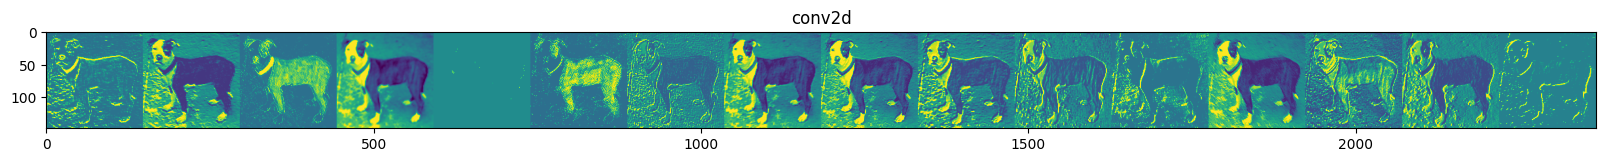

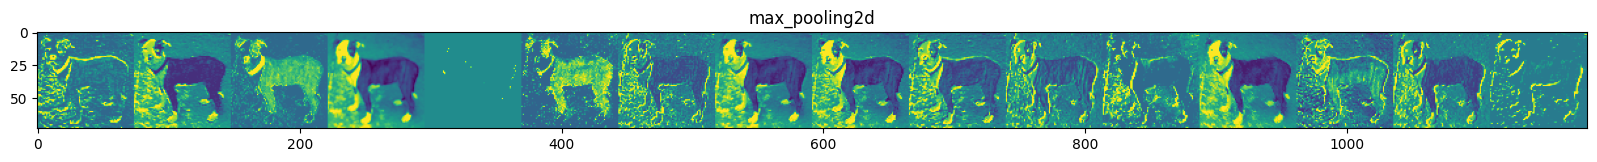

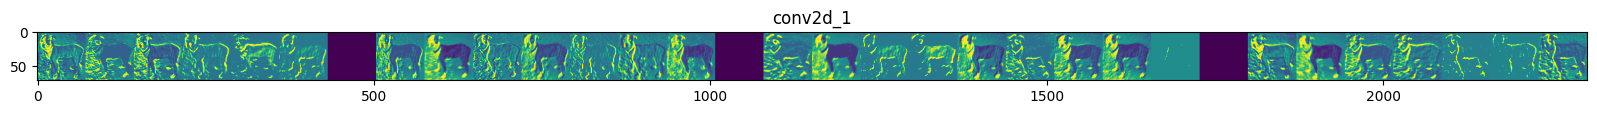

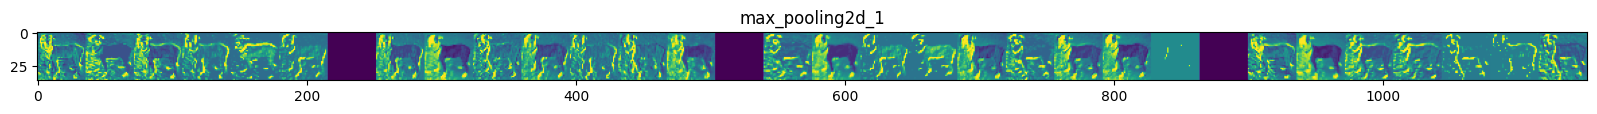

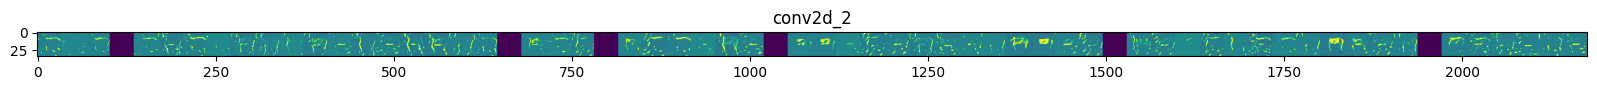

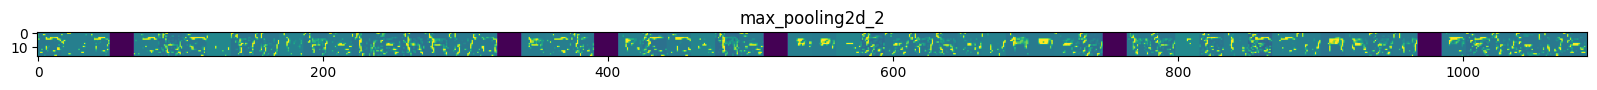

In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Давайте определим новую модель, которая будет принимать изображение в качестве входных данных и выводить
# промежуточные представления для всех слоев предыдущей модели после первый.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Давайте подготовим случайное входное изображение кошки или собаки из обучающего набора.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # это PIL-изображение
x = img_to_array(img)  # Массив Numpy с формой (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Массив Numpy с формой (1, 150, 150, 3)

# Изменение масштаба на 1/255
x /= 255

# Пропустим наш образ через нашу сеть, получив таким образом все
# промежуточные представления для этого изображения.
successive_feature_maps = visualization_model.predict(x)

# Это названия слоев, поэтому они могут быть частью нашего сюжета.
layer_names = [layer.name for layer in model.layers[1:]]

# Теперь давайте отобразим наши представления
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Просто сделайте это для слоев conv/maxpool, а не для полностью связанных слоев
    n_features = feature_map.shape[-1]  # количество функций в функции map
    # # Карта объектов имеет форму (1, size, size, n_features)
    size = feature_map.shape[1]
    # Мы разместим наши изображения в этой матрице
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Постобработка функции, чтобы сделать ее визуально привлекательной
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Мы разместим каждый фильтр в этой большой горизонтальной сетке
      display_grid[:, i * size : (i + 1) * size] = x
    # Отображение сетки
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Как видите, мы переходим от необработанных пикселей изображений к все более абстрактным и компактным представлениям. Представления ниже по течению начинают подчеркивать то, на что сеть обращает внимание, и они показывают все меньше и меньше «активируемых» функций; большинство из них установлены на ноль. Это называется «разреженность». Разреженность представлений — ключевая особенность глубокого обучения.


Эти представления несут все меньше информации об исходных пикселях изображения, но все более точную информацию о классе изображения. Вы можете думать о сети (или глубокой сети в целом) как о конвейере обработки информации.

### Оценка точности и потерь модели

Давайте построим график точности и потерь обучения/проверки, собранных во время обучения:

Text(0.5, 1.0, 'Training and validation loss')

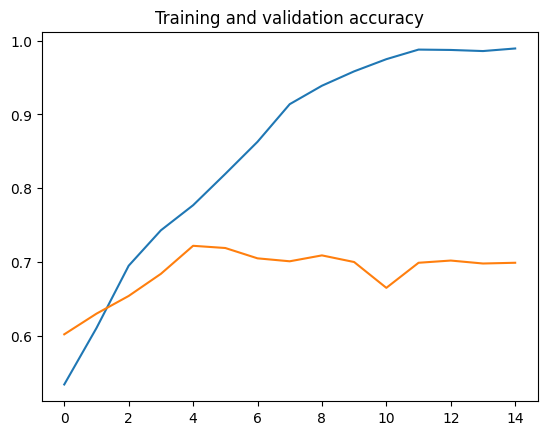

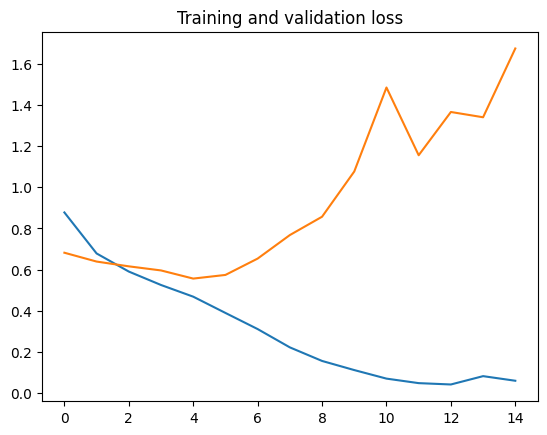

In [22]:
# Получить список результатов точности данных обучения и проверки
# комплектов для каждой эпохи обучения
acc = history.history['acc']
val_acc = history.history['val_acc']

# Получить список результатов по данным обучения и проверки
# комплектов для каждой эпохи обучения
loss = history.history['loss']
val_loss = history.history['val_loss']

# Получить количество эпох
epochs = range(len(acc))

# График обучения и точности проверки за эпоху
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Построение графика потерь при обучении и проверке за эпоху
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Как видите, мы **переоснащаемся**, как будто это выходит из моды. Наша точность обучения (синий цвет) приближается к 100% (!), тогда как точность проверки (зеленый цвет) колеблется на уровне 70%. Наши потери при проверке достигают минимума всего через пять эпох.

Поскольку у нас относительно небольшое количество обучающих примеров (2000 г.), переобучение должно быть нашей заботой номер один. Переоснащение происходит, когда модель, на которой представлено слишком мало примеров, изучает закономерности, которые не обобщаются на новые данные, т. е. когда модель начинает использовать нерелевантные функции для составления прогнозов. Например, если вы, как человек, видите только три изображения людей-лесорубов и три изображения людей-моряков, и среди них единственный человек, носящий кепку, — это лесоруб, вы можете начать думать, что носить кепку это признак того, что ты лесоруб, а не моряк. Тогда вы получите довольно паршивый классификатор лесорубов и моряков.

Переобучение — это центральная проблема машинного обучения: учитывая, что мы подгоняем параметры нашей модели к заданному набору данных, как мы можем быть уверены, что представления, полученные с помощью модели, будут применимы к данным, которых раньше не было? Как нам избежать изучения вещей, специфичных для обучающих данных?

В следующем упражнении мы рассмотрим способы предотвращения переобучения в модели классификации кошек и собак.

## Очистка

Прежде чем выполнять следующее упражнение, запустите следующую ячейку, чтобы завершить работу ядра и освободить ресурсы памяти:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)